In [75]:
from minisom import MiniSom
import pandas as pd 
import numpy as np 

data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")

In [76]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [77]:
#unsupervised learning need to drop the class column
Class =  data['DEATH_EVENT']
Attributes = data.drop(['DEATH_EVENT'],axis = 1)

In [78]:
Class


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [79]:
# make type all become float, may not need this.
Attributes["age"] = Attributes["age"].astype('float64') 
Attributes["creatinine_phosphokinase"] = Attributes["creatinine_phosphokinase"].astype('float64')
Attributes["ejection_fraction"] = Attributes["ejection_fraction"].astype('float64')  
Attributes["platelets"] = Attributes["platelets"].astype('float64') 
Attributes["time"] = Attributes["time"].astype('float64') 
Attributes["serum_creatinine"] = Attributes["serum_creatinine"].astype('float64') 
Attributes["serum_sodium"] = Attributes["serum_sodium"].astype('float64') 




In [80]:
Attributes.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                           int64
smoking                       int64
time                        float64
dtype: object

In [81]:
# we standardize each column(attribute) first
from sklearn import preprocessing
Attributes = preprocessing.scale(Attributes)

# then we make each row has unit length

for i in range (299):                                                              
    length = sum(map(lambda x: float(x**2), Attributes[i]))**0.5
    for j in range(len(Attributes[i])):
        Attributes[i][j] = Attributes[i][j]/length
print(Attributes)

[[ 3.27572173e-01 -2.39197641e-01  4.55075444e-05 ...  2.02013448e-01
  -1.88831348e-01 -4.47446902e-01]
 [-6.21838830e-02 -1.10260457e-01  9.51168690e-01 ...  9.31200452e-02
  -8.70436293e-02 -2.02987836e-01]
 [ 9.39138050e-02 -2.33184362e-01 -1.20443242e-01 ...  1.96934957e-01
   3.89261481e-01 -4.25834150e-01]
 ...
 [-2.09125219e-01 -1.36621520e-01  2.39330019e-01 ... -2.13184160e-01
  -1.07854014e-01  2.99040829e-01]
 [-3.33938088e-01 -2.18161775e-01  4.73436285e-01 ...  1.84247689e-01
   3.64183837e-01  4.83982662e-01]
 [-2.64763955e-01 -2.52798637e-01 -1.15594677e-01 ...  2.13500117e-01
   4.22004163e-01  5.79549742e-01]]


In [82]:
#16, 16 is the width and height of neurons. 
# sigma might be D 
som = MiniSom(20,20,12,sigma=1.5,learning_rate=0.5)
som.pca_weights_init(Attributes)
som.train(Attributes,1000,verbose=True) #1000 is the epochs 


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.45736432727237963


In [83]:
#change nominal class value to number 
#class 0/1

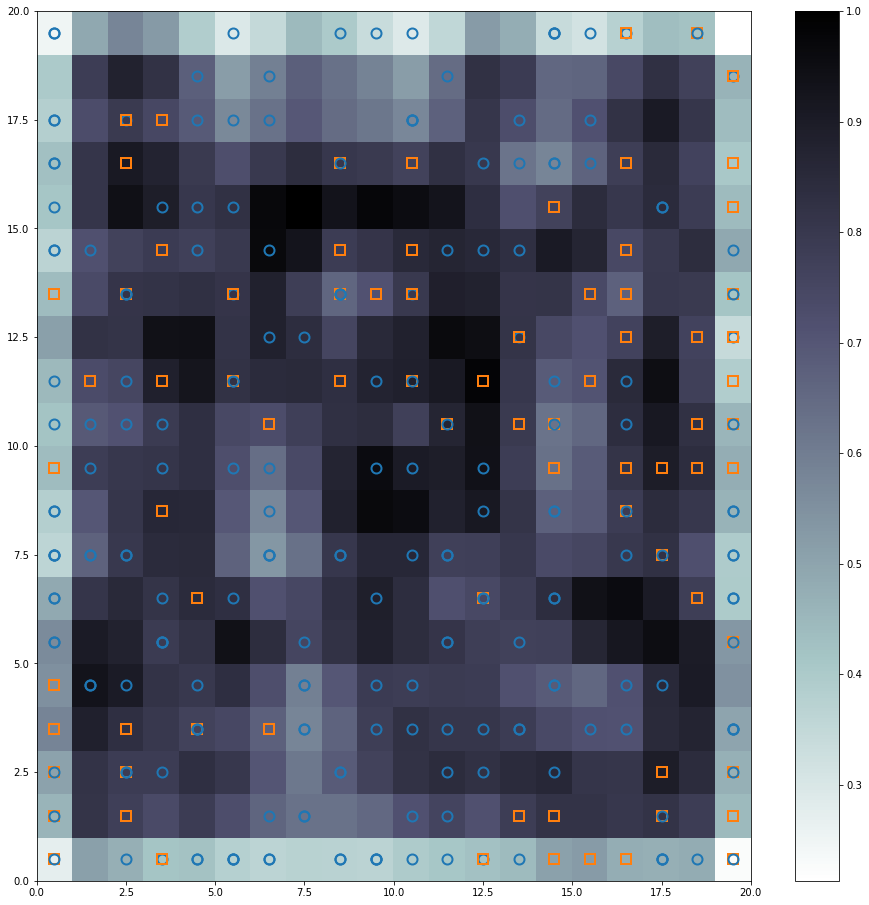

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
markers = ['o', 's', 'D','p','h']  # circle, square, Diamond, pentagon, hexigon
colors = ['C0', 'C1', 'C2','C3','C4']
for cnt, xx in enumerate(Attributes):
    w = som.winner(xx)  # getting the winner, format is (w[0],w[1]), like coordinates
    plt.plot(w[0]+.5, w[1]+.5, markers[Class[cnt]], markerfacecolor='None', # we draw dots. 
             markeredgecolor=colors[Class[cnt]], markersize=10, markeredgewidth=2)

plt.show()

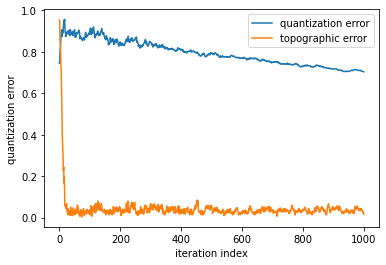

In [85]:
som = MiniSom(10, 20, 12, sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(Attributes))
    som.update(Attributes[rand_i], som.winner(Attributes[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(Attributes))
    t_error.append(som.topographic_error(Attributes))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

In [86]:
def classify(som, data):
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

array_class = []
for i in range(len(Class)):
    array_class.append(Class[i])

X_train, X_test, y_train, y_test = train_test_split(Attributes, array_class, stratify=array_class)

som = MiniSom(7, 7, 12, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(X_train)
som.train_random(X_train, 500, verbose=False)

classes = ["DEATH_EVENT0",]
print(classification_report(y_test, classify(som, X_test),target_names = classes) )
#print(array_class)

ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter